In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import seaborn as sns

# Supporting Functions

In [41]:
def print_features(G):
    print("Betweeness centrality is ", nx.betweenness_centrality(G))
    
    if nx.is_connected(G) ==  True:
        print("Diameter is ", nx.diameter(G))
    else:
        print("Graph G is not connected")
        
    print("Clustering coefficient is ", nx.average_clustering(G))
    print("Number of connected components is", nx.number_connected_components(G))

In [35]:
def draw_histogram(G):
    df_matrix = pd.DataFrame.from_dict(dict(nx.shortest_path_length(G)))
    df_edge = df_matrix.rename_axis('Source')\
          .reset_index()\
          .melt('Source', value_name='Length', var_name='Target')\
          .query('Source != Target')\
          .reset_index(drop=True)

    length_sequence = sorted(list(df_edge['Length']))

    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
    max_degree = max(degree_sequence)

    dict_clustering = dict(nx.clustering(G))
    clustering_sequence = list(dict_clustering.values())
    clustering_sequence = [ '%.2f' % elem for elem in clustering_sequence ]

    fig = plt.figure( figsize=(9, 12))
    axgrid = fig.add_gridspec(6, 4)

    ax0 = fig.add_subplot(axgrid[:2, :])
    ax0.bar(*np.unique(length_sequence, return_counts=True))
    ax0.set_title("Shortest Path Length histogram")
    ax0.set_xlabel("Length")
    ax0.set_ylabel("# of Paths")

    ax1 = fig.add_subplot(axgrid[2:4, :])
    ax1.bar(*np.unique(clustering_sequence, return_counts=True))
    max_node1 = max(*np.unique(clustering_sequence, return_counts=True)[1])
    ax1.set_yticks(np.arange(0, max_node1+1, 1))
    ax1.set_title("Clustering histogram")
    ax1.set_xlabel("Clustering")
    ax1.set_ylabel("# of Nodes")

    ax2 = fig.add_subplot(axgrid[4:, :])
    ax2.bar(*np.unique(degree_sequence, return_counts=True))
    ax2.set_xticks(np.arange(1, max_degree+1, 1))
    ax2.set_title("Degree histogram")
    ax2.set_xlabel("Degree")
    max_node2 = max(*np.unique(degree_sequence, return_counts=True)[1])
    ax2.set_yticks(np.arange(0, max_node2+1, 1))
    ax2.set_ylabel("# of Nodes")

    fig.tight_layout()
    plt.show()

# 1 Real Networks

## 1.1 Karate Club Dataset

In [19]:
### network generatoin
f_karate = open("karate/zachary.dat", "r")
df_karate = f_karate.readlines()
df_zachestr = np.array(df_karate[7:41])

df_zache = np.empty((0, len(df_zachestr)), int)

for i in df_zachestr:
    df_zache = np.append(df_zache, [np.fromstring(i, dtype=int, sep=' ')],  axis=0)

G_karate = nx.from_numpy_matrix(df_zache)

Betweeness centrality is  {0: 0.43763528138528146, 1: 0.053936688311688304, 2: 0.14365680615680618, 3: 0.011909271284271283, 4: 0.0006313131313131313, 5: 0.02998737373737374, 6: 0.029987373737373736, 7: 0.0, 8: 0.05592682780182781, 9: 0.0008477633477633478, 10: 0.0006313131313131313, 11: 0.0, 12: 0.0, 13: 0.04586339586339586, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.03247504810004811, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.017613636363636363, 24: 0.0022095959595959595, 25: 0.0038404882154882154, 26: 0.0, 27: 0.02233345358345358, 28: 0.0017947330447330447, 29: 0.0029220779220779218, 30: 0.014411976911976909, 31: 0.13827561327561325, 32: 0.145247113997114, 33: 0.30407497594997596}
Diameter is  5
Clustering coefficient is  0.5706384782076823
Number of connected components is 1


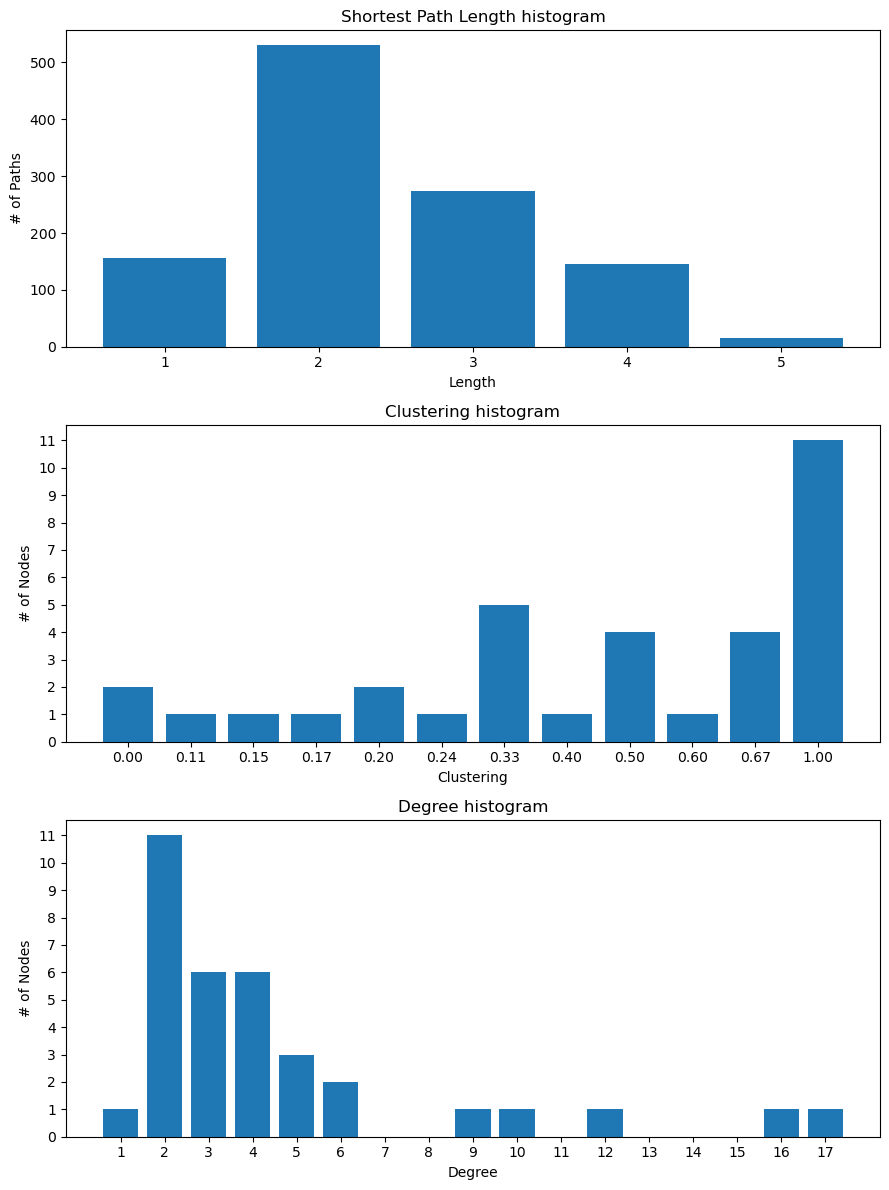

In [27]:
print_features(G_karate)
draw_histogram(G_karate)

## 1.2 Prison Dataset

In [5]:
# data load and preprocess
f_prison = open("prison/prison.dat", "r")
fin_prison = f_prison.readlines()
df_prisonstr = np.array(fin_prison[4:71])
# print(df_prisonstr)

df_prison = np.empty((0, len(df_prisonstr)), int)
for i in df_prisonstr:
    df_prison = np.append(df_prison, [np.fromstring(i, dtype=int, sep=' ')],  axis=0)
df_prison = pd.DataFrame(df_prison)
G_prison = nx.from_pandas_adjacency(df_prison,create_using=nx.DiGraph())
G_prison = nx.to_undirected(G_prison)

Betweeness centrality is  {0: 0.0, 1: 0.03856476856476857, 2: 0.0012359862359862357, 3: 0.02029028210846393, 4: 0.030800882619064437, 5: 0.006539117448208356, 6: 0.033890848209030024, 7: 0.18394161394161393, 8: 0.0345933191387737, 9: 0.030303030303030304, 10: 0.0, 11: 0.03918606645879374, 12: 0.00851981351981352, 13: 0.0174506508772243, 14: 0.0, 15: 0.18665706541580668, 16: 0.0, 17: 0.06315930896350477, 18: 0.0, 19: 0.060693473193473194, 20: 0.06043456543456543, 21: 0.0, 22: 0.0007581307581307581, 23: 0.0007581307581307581, 24: 0.005102120102120102, 25: 0.005697612410899123, 26: 0.021149567862854584, 27: 0.034335697972061596, 28: 0.021615068433250253, 29: 0.12870578010438147, 30: 0.0, 31: 0.013005344823526643, 32: 0.03364764217911071, 33: 0.014966994285176108, 34: 0.0, 35: 0.0, 36: 0.08171069153586635, 37: 0.0, 38: 0.0023579198579198575, 39: 0.011196581196581198, 40: 0.07754581406679309, 41: 0.0, 42: 0.018916903479840545, 43: 0.04202020202020202, 44: 0.06285510979566923, 45: 0.02523365

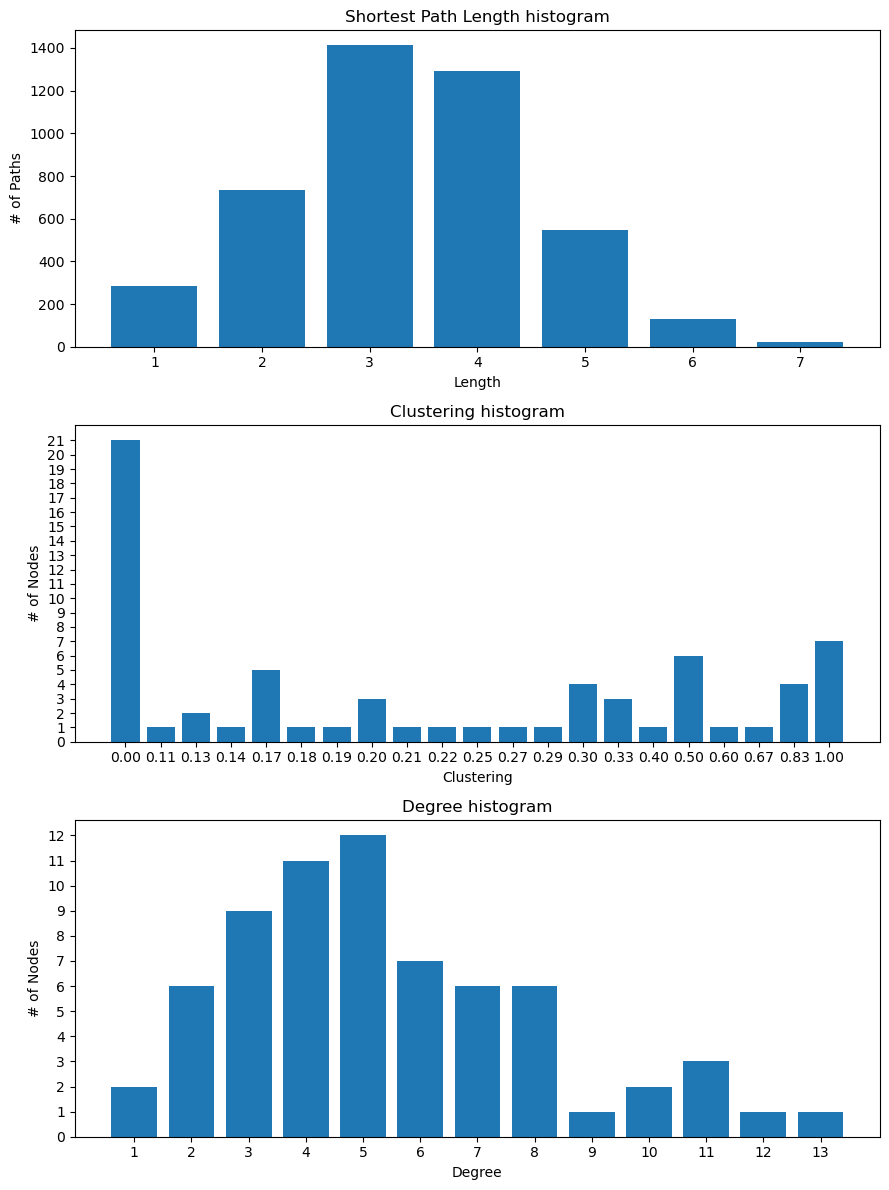

In [29]:
print_features(G_prison)
draw_histogram(G_prison)

## 1.3 Dolphins Dataset

In [24]:
# data load and preprocess
f_dophin = open("dolphins/dolphins.dat", "r")
fin_dophin = f_dophin.readlines()
df_dophinstr = np.array(fin_dophin[130:192])

df_dophoin = np.empty((0, len(df_dophinstr)), int)
for i in df_dophinstr:
    df_dophoin = np.append(df_dophoin, [np.fromstring(i, dtype=int, sep=' ')],  axis=0)

G_dolphin = nx.from_numpy_matrix(df_dophoin)

Betweeness centrality is  {0: 0.01908259621374376, 1: 0.21332443553281097, 2: 0.00907281243346817, 3: 0.0023737965131407756, 4: 0.0, 5: 0.004380300179480508, 6: 0.029372536747686685, 7: 0.11823861926938342, 8: 0.022365737598409235, 9: 0.020894380361593475, 10: 0.016092020911693046, 11: 0.0, 12: 0.0, 13: 0.05284632843869151, 14: 0.06197200484885411, 15: 0.03329222098223321, 16: 0.0033047098620869113, 17: 0.11430016291546972, 18: 0.014854899716954898, 19: 0.013314394166853183, 20: 0.10264573972090968, 21: 0.012700653930162125, 22: 0.0, 23: 0.04218278563875618, 24: 0.007383043489600868, 25: 0.0016441148408361526, 26: 0.00436247723132969, 27: 0.029236860493157983, 28: 0.06675695466395656, 29: 0.06552928249649563, 30: 0.03305046077177225, 31: 0.0, 32: 0.03278688524590164, 33: 0.057166440117259784, 34: 0.032694759702956426, 35: 0.0, 36: 0.24823719602893804, 37: 0.13856978865859435, 38: 0.04535223883584539, 39: 0.070516778539934, 40: 0.1431495183426175, 41: 0.023251600670186175, 42: 0.0291579

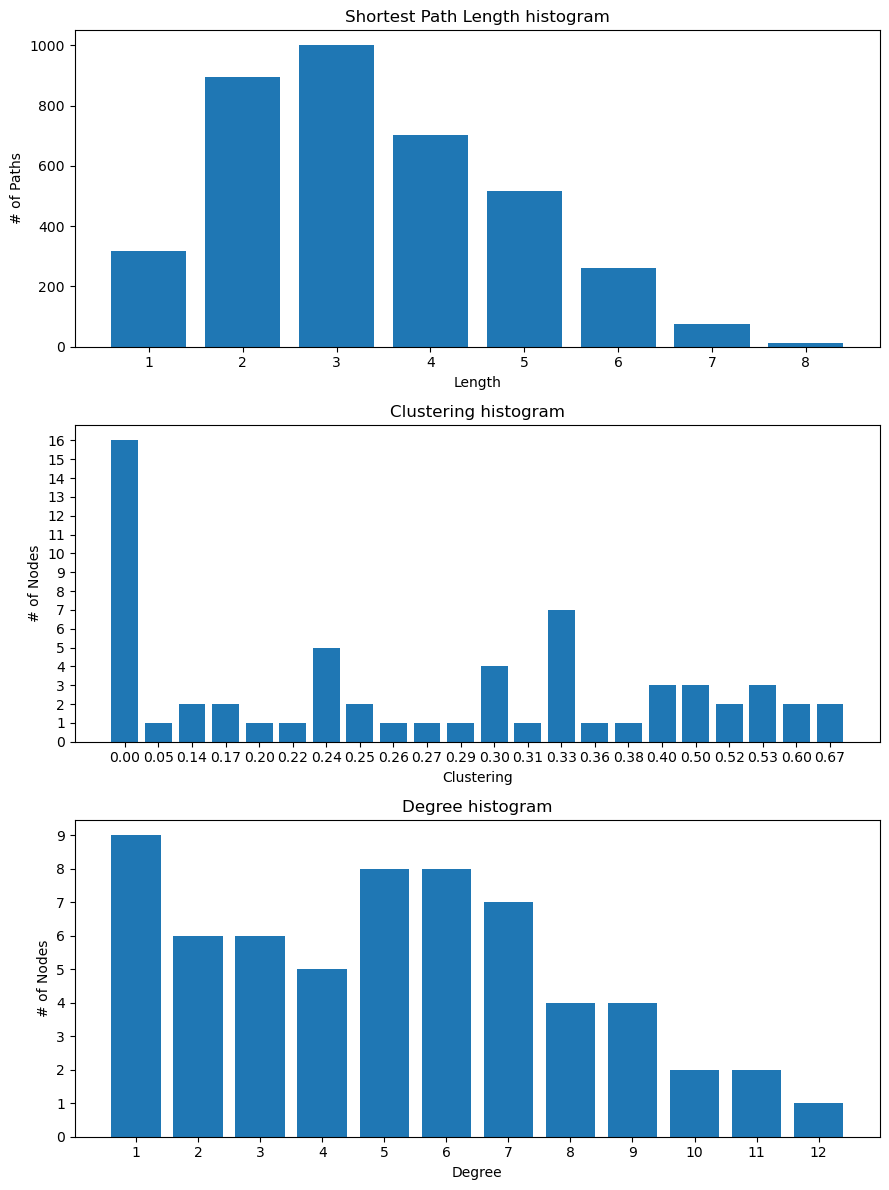

In [28]:
print_features(G_dolphin)
draw_histogram(G_dolphin)

# Erdos-Renyi model/Karate Club

graph 0
-------------------------------------
Betweeness centrality is  {0: 0.08685673018059381, 1: 0.06815886134067951, 2: 0.050462962962962966, 3: 0.04191017316017316, 4: 0.03259604978354979, 5: 0.018797348484848486, 6: 0.04226354453627181, 7: 0.09526679128951855, 8: 0.020661976911976913, 9: 0.03262542907429271, 10: 0.00441919191919192, 11: 0.10281241801128162, 12: 0.013587580348943988, 13: 0.015957259281122915, 14: 0.054175753749617396, 15: 0.049030483405483404, 16: 0.04549287518037518, 17: 0.01625631313131313, 18: 0.07132588055883511, 19: 0.025662878787878787, 20: 0.02862116839389567, 21: 0.14420346593642047, 22: 0.08811559862696225, 23: 0.0, 24: 0.0, 25: 0.08217975206611569, 26: 0.025645661157024793, 27: 0.05179418645327736, 28: 0.0934719215969216, 29: 0.016682449494949497, 30: 0.003661616161616162, 31: 0.005839646464646464, 32: 0.09728760822510821, 33: 0.05372187786960514}
Diameter is  5
Clustering coefficient is  0.09320728291316527
Number of connected components is 1


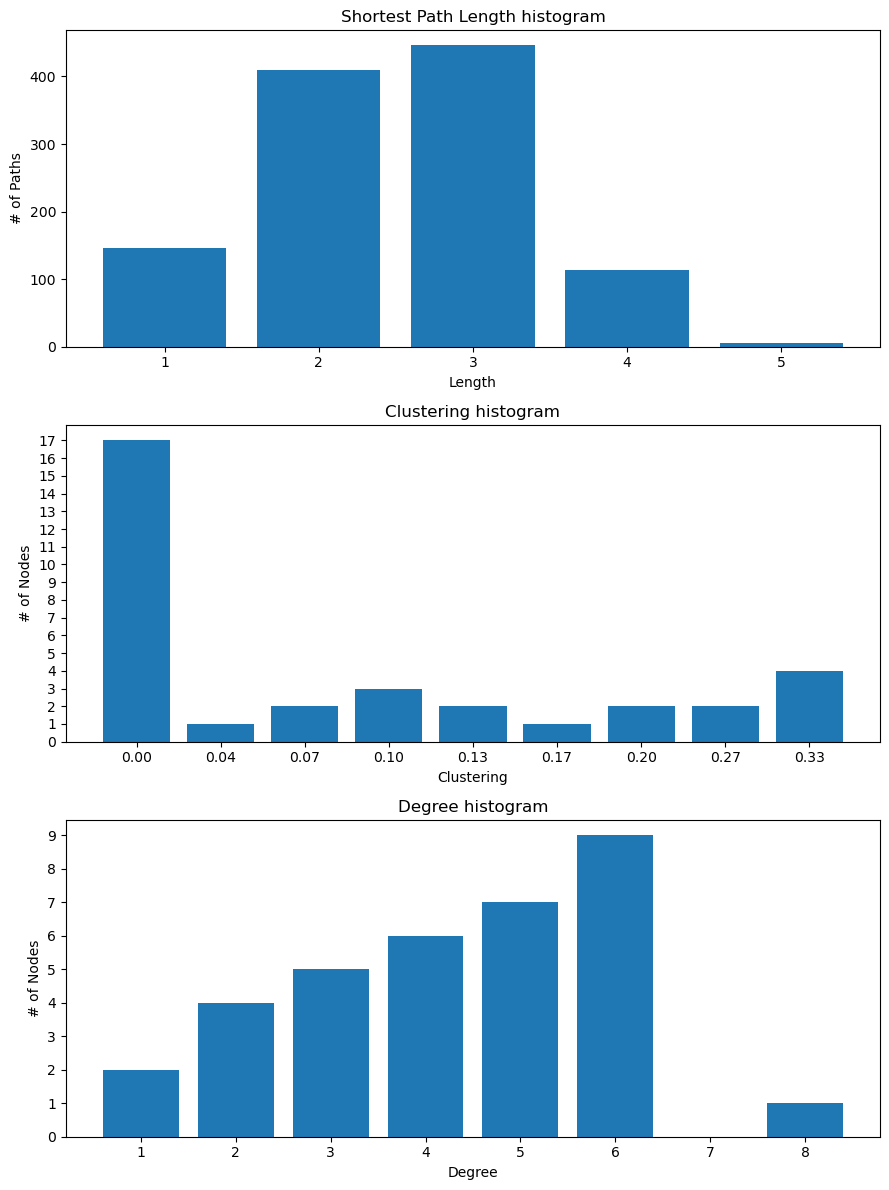

graph 1
-------------------------------------
Betweeness centrality is  {0: 0.0464556277056277, 1: 0.025883960810431397, 2: 0.050345603470603496, 3: 0.003235479797979798, 4: 0.02449720418470418, 5: 0.020355002432208315, 6: 0.043861653052829526, 7: 0.04885163546594028, 8: 0.010511363636363636, 9: 0.037433287709023, 10: 0.0036300505050505054, 11: 0.08310612998113, 12: 0.013585961597325235, 13: 0.04153759564855822, 14: 0.05373473668092653, 15: 0.02503996950019678, 16: 0.07035737274707861, 17: 0.025963106202076786, 18: 0.055402420292126185, 19: 0.05740683268256799, 20: 0.06270023116614026, 21: 0.01163358421881149, 22: 0.012260887260887261, 23: 0.1703975438183326, 24: 0.03984917649690376, 25: 0.057214786166992035, 26: 0.0, 27: 0.039085360383822945, 28: 0.09822102659669504, 29: 0.057197391388567866, 30: 0.026167929292929295, 31: 0.07836531721892684, 32: 0.058321315122785704, 33: 0.01708742646242646}
Diameter is  5
Clustering coefficient is  0.11118113912231563
Number of connected components 

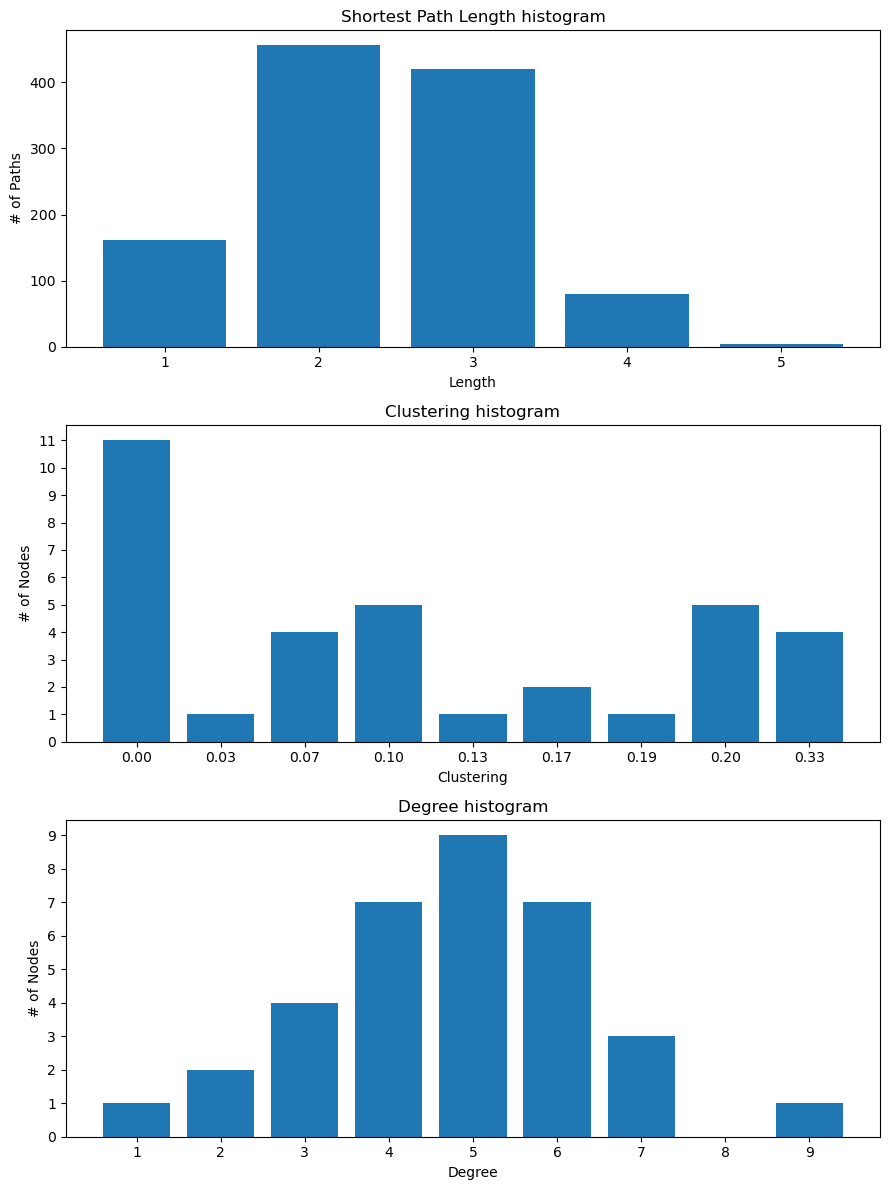

graph 2
-------------------------------------
Betweeness centrality is  {0: 0.030476641414141418, 1: 0.01444805194805195, 2: 0.0682081228956229, 3: 0.0518184072871573, 4: 0.05284353956228957, 5: 0.06300392316017317, 6: 0.09741161616161614, 7: 0.012486471861471862, 8: 0.016145833333333335, 9: 0.05159218674843675, 10: 0.040555104617604615, 11: 0.015968840187590188, 12: 0.09472064393939393, 13: 0.007933125901875903, 14: 0.147778379028379, 15: 0.056240981240981244, 16: 0.049712151274651284, 17: 0.029268127705627707, 18: 0.002404250841750842, 19: 0.01608946608946609, 20: 0.06184238215488216, 21: 0.0, 22: 0.05806277056277056, 23: 0.021231286075036073, 24: 0.02280844155844156, 25: 0.06500157828282828, 26: 0.03809598965848966, 27: 0.08331304112554111, 28: 0.020401184463684465, 29: 0.02381929413179413, 30: 0.016795183982683985, 31: 0.026787968975468972, 32: 0.017942821067821066, 33: 0.01494370791245791}
Diameter is  4
Clustering coefficient is  0.15492530345471522
Number of connected components

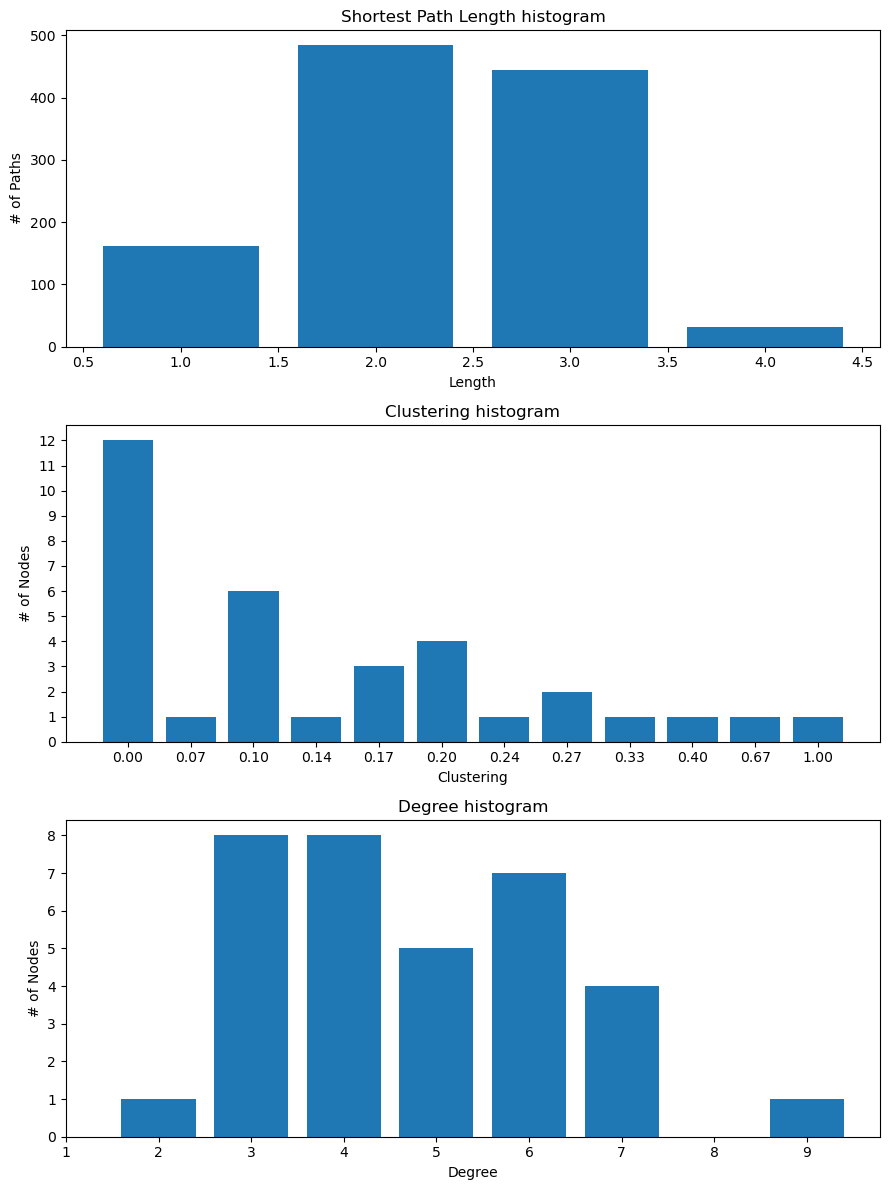

graph 3
-------------------------------------
Betweeness centrality is  {0: 0.028708964646464642, 1: 0.1825096778221778, 2: 0.05261682761682763, 3: 0.03608630952380952, 4: 0.0, 5: 0.06277056277056278, 6: 0.06928661616161617, 7: 0.01148989898989899, 8: 0.0, 9: 0.06209190115440116, 10: 0.0, 11: 0.02978219696969697, 12: 0.0815644425019425, 13: 0.022685821123321123, 14: 0.0, 15: 0.07816812816812818, 16: 0.07011183261183261, 17: 0.09530365467865468, 18: 0.0549232017982018, 19: 0.009209540459540458, 20: 0.024164146039146038, 21: 0.13524820087320086, 22: 0.04484265734265736, 23: 0.054608585858585856, 24: 0.06406128593628593, 25: 0.06753073315573316, 26: 0.010596174658674658, 27: 0.042479742479742476, 28: 0.03765748140748141, 29: 0.0, 30: 0.0031444250194250195, 31: 0.05468802031302032, 32: 0.074855352980353, 33: 0.008889374514374515}
Graph G is not connected
Clustering coefficient is  0.1507703081232493
Number of connected components is 2


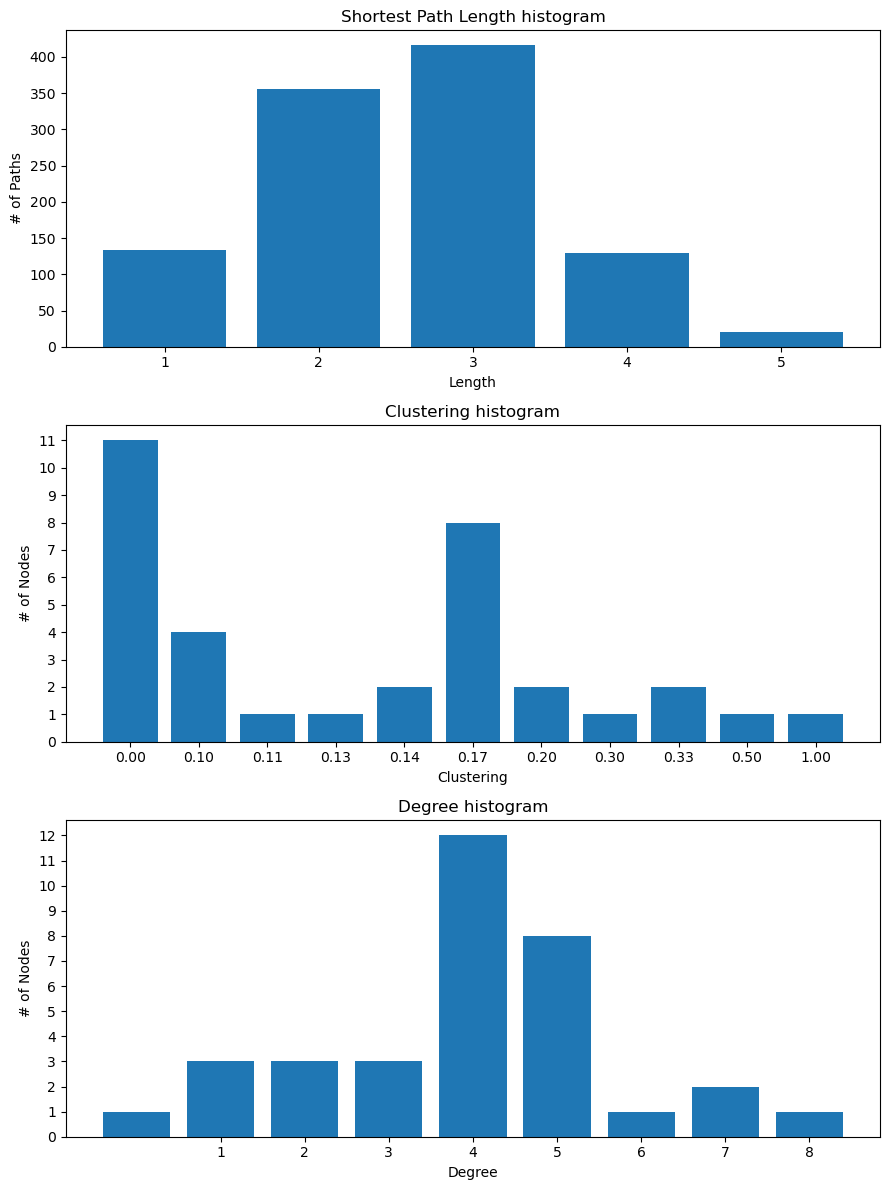

graph 4
-------------------------------------
Betweeness centrality is  {0: 0.011460588023088024, 1: 0.04625120250120251, 2: 0.0, 3: 0.11194234006734007, 4: 0.04533053751803752, 5: 0.05148208273208273, 6: 0.046790073352573354, 7: 0.003330176767676768, 8: 0.0, 9: 0.04015903078403079, 10: 0.08073367604617604, 11: 0.002138197450697451, 12: 0.005208333333333334, 13: 0.07425895863395865, 14: 0.051391143578643585, 15: 0.09878697691197691, 16: 0.07428977272727273, 17: 0.033408489658489665, 18: 0.07185245310245308, 19: 0.15600949975949976, 20: 0.06539201539201539, 21: 0.0020720598845598848, 22: 0.006110209235209235, 23: 0.0054292929292929296, 24: 0.04028679653679654, 25: 0.0, 26: 0.04870355339105339, 27: 0.17353294853294854, 28: 0.05801767676767677, 29: 0.0634078884078884, 30: 0.012342171717171717, 31: 0.05290629509379509, 32: 0.0, 33: 0.021899801587301586}
Diameter is  5
Clustering coefficient is  0.15347805788982263
Number of connected components is 1


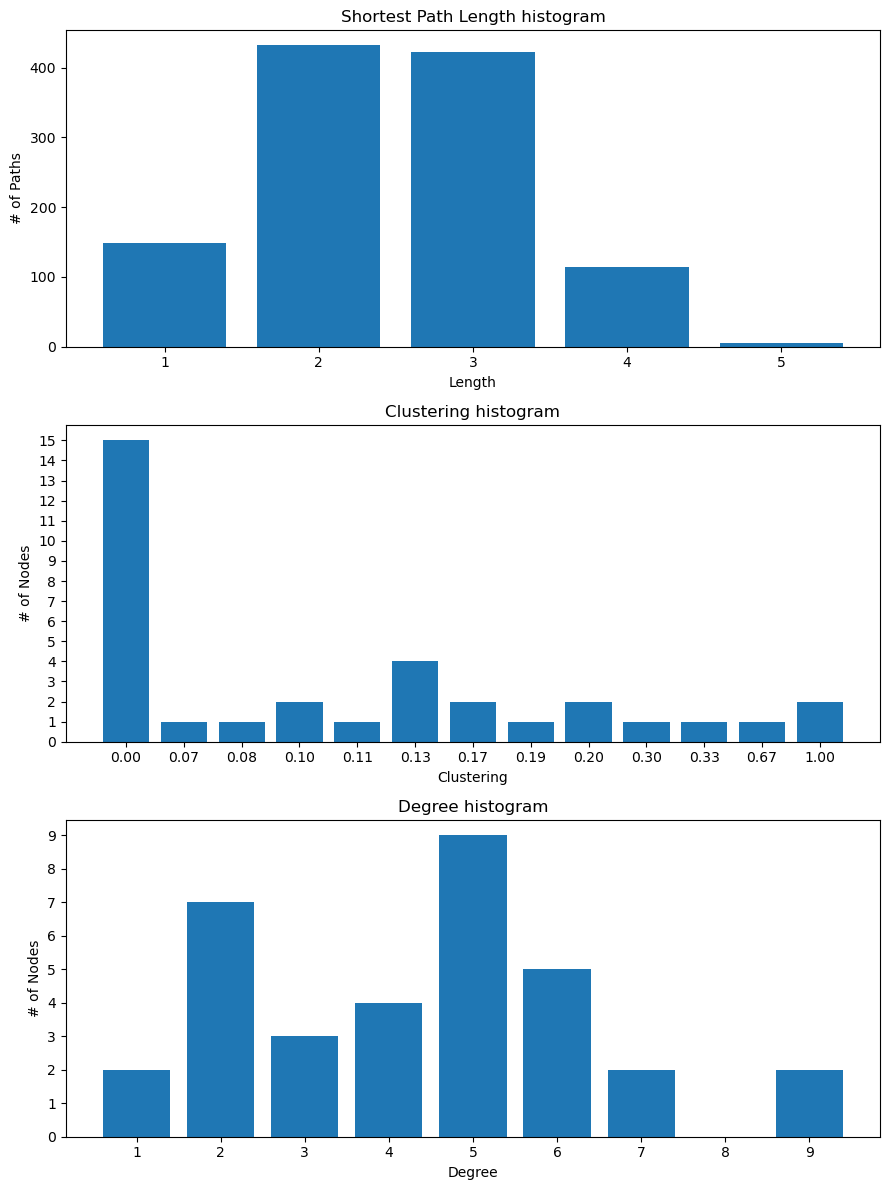

graph 5
-------------------------------------
Betweeness centrality is  {0: 0.05295138888888889, 1: 0.01453598484848485, 2: 0.022930194805194804, 3: 0.1257139850889851, 4: 0.011047979797979798, 5: 0.0, 6: 0.08631553631553629, 7: 0.05860088985088987, 8: 0.05386078042328043, 9: 0.16536420755170758, 10: 0.005366161616161617, 11: 0.02349086099086099, 12: 0.030686327561327557, 13: 0.09654280904280904, 14: 0.015548340548340547, 15: 0.05237343674843675, 16: 0.04605579605579605, 17: 0.0077861952861952854, 18: 0.10897065897065897, 19: 0.005523989898989899, 20: 0.019267827080327076, 21: 0.0, 22: 0.006691919191919192, 23: 0.05655212842712842, 24: 0.12876458032708035, 25: 0.1259943181818182, 26: 0.0972207190957191, 27: 0.016779401154401154, 28: 0.0017466329966329965, 29: 0.048877164502164505, 30: 0.03389099326599326, 31: 0.01053992303992304, 32: 0.026884920634920633, 33: 0.013199705387205387}
Diameter is  6
Clustering coefficient is  0.1709150326797386
Number of connected components is 1


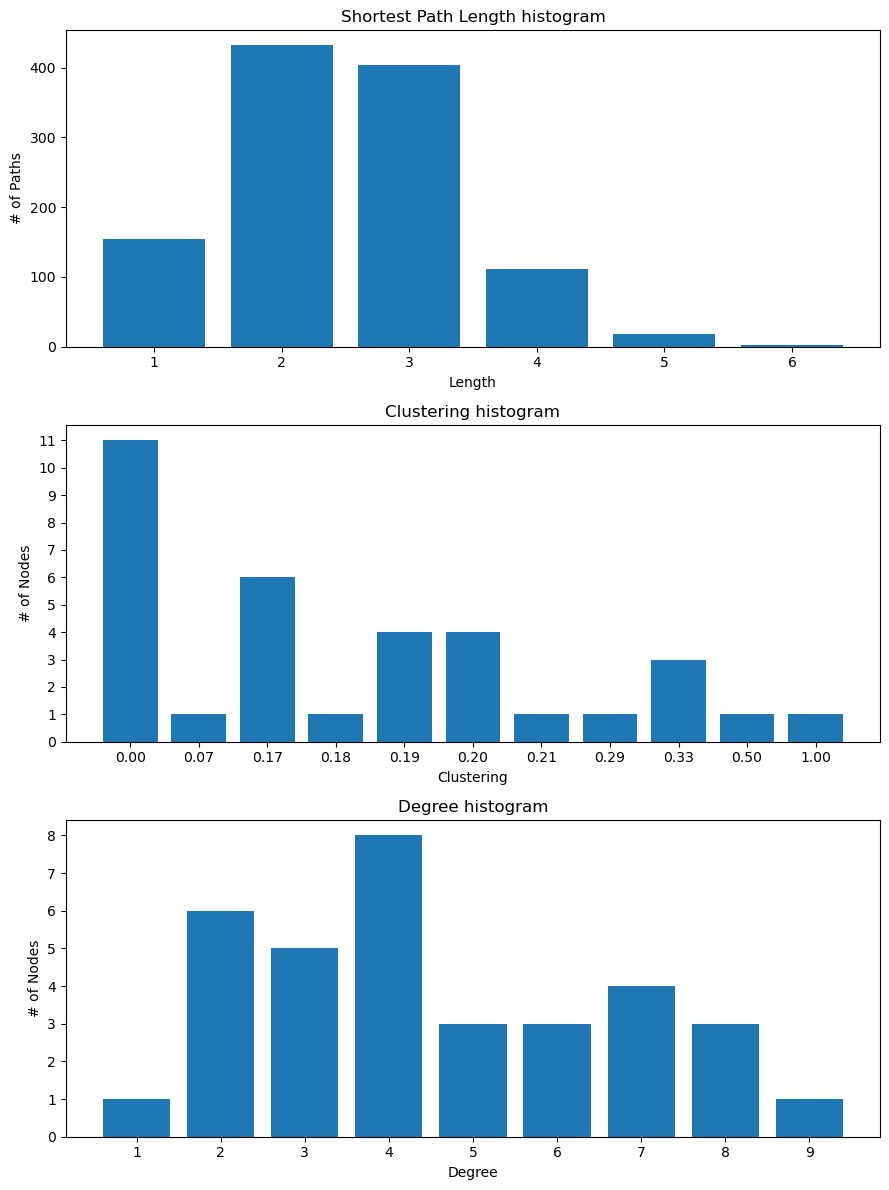

graph 6
-------------------------------------
Betweeness centrality is  {0: 0.0758222101972102, 1: 0.029250090187590196, 2: 0.020565025252525255, 3: 0.06428646584896586, 4: 0.0452020202020202, 5: 0.02158414502164502, 6: 0.025117243867243864, 7: 0.0, 8: 0.019058892496392494, 9: 0.09181096681096682, 10: 0.0010146103896103895, 11: 0.0, 12: 0.0, 13: 0.004565746753246753, 14: 0.07070707070707073, 15: 0.02010732323232323, 16: 0.0552579365079365, 17: 0.008128156565656566, 18: 0.005008417508417509, 19: 0.08362719456469456, 20: 0.09542824074074076, 21: 0.0, 22: 0.04060094997594998, 23: 0.0162630772005772, 24: 0.02750871813371813, 25: 0.017125871813371815, 26: 0.015530303030303033, 27: 0.07260702260702262, 28: 0.06296296296296297, 29: 0.007435966810966811, 30: 0.06796987734487735, 31: 0.09168771043771042, 32: 0.009911616161616161, 33: 0.044081439393939395}
Graph G is not connected
Clustering coefficient is  0.12843137254901962
Number of connected components is 3


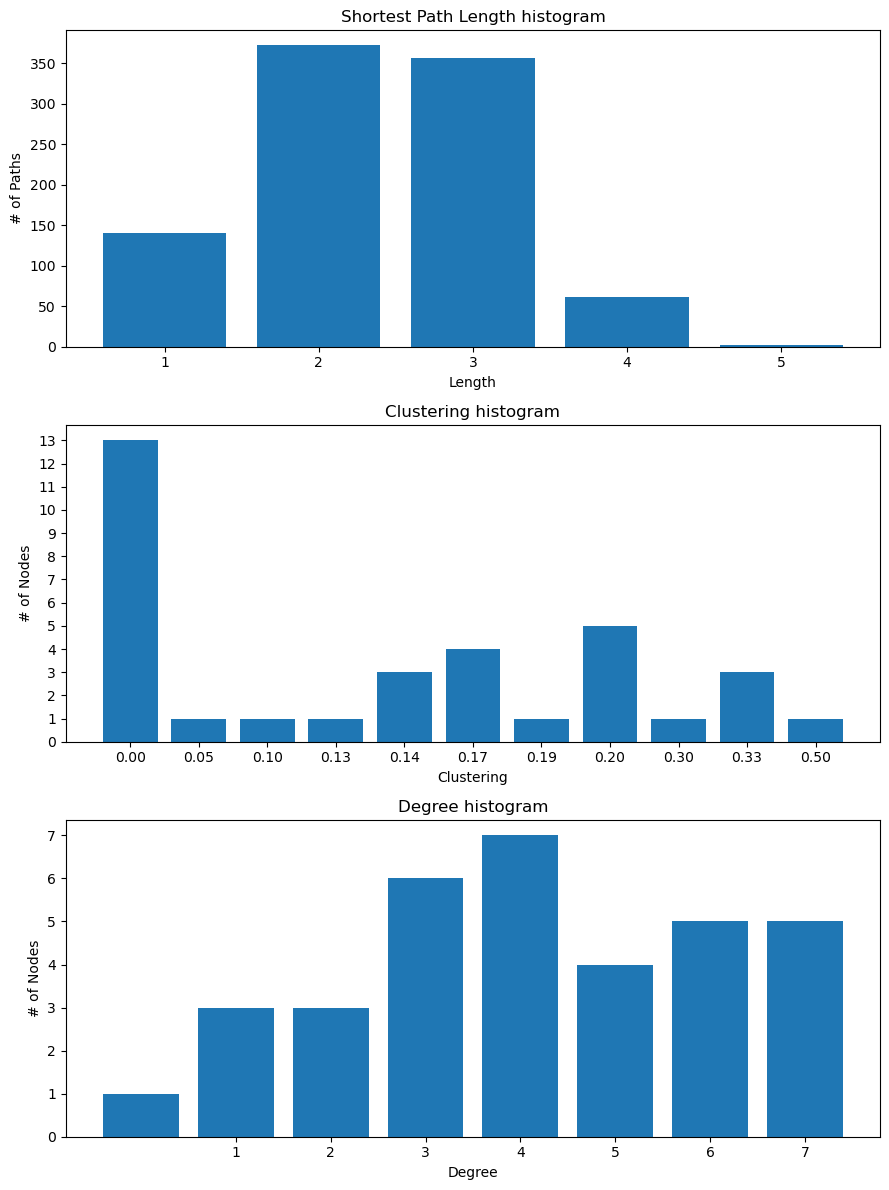

graph 7
-------------------------------------
Betweeness centrality is  {0: 0.018181818181818184, 1: 0.0577581561956562, 2: 0.06419517982017982, 3: 0.01900541588041588, 4: 0.05449284511784511, 5: 0.013891143578643577, 6: 0.0016121031746031747, 7: 0.03163393319643319, 8: 0.026556776556776546, 9: 0.012980248917748915, 10: 0.013101019351019353, 11: 0.042260401635401644, 12: 0.16708736864986867, 13: 0.0904145622895623, 14: 0.04177078708328709, 15: 0.015982744107744105, 16: 0.0058441558441558435, 17: 0.08709045584045584, 18: 0.017126623376623375, 19: 0.040610720298220306, 20: 0.06011078042328043, 21: 0.018449374699374698, 22: 0.07136497761497762, 23: 0.014642706830206829, 24: 0.054813647001147006, 25: 0.014951599326599327, 26: 0.04993149211899212, 27: 0.003195646945646946, 28: 0.008782536907536907, 29: 0.015004093129093128, 30: 0.003805916305916306, 31: 0.08272682178932181, 32: 0.027868716931216928, 33: 0.04442189754689755}
Diameter is  4
Clustering coefficient is  0.1286817757405993
Number

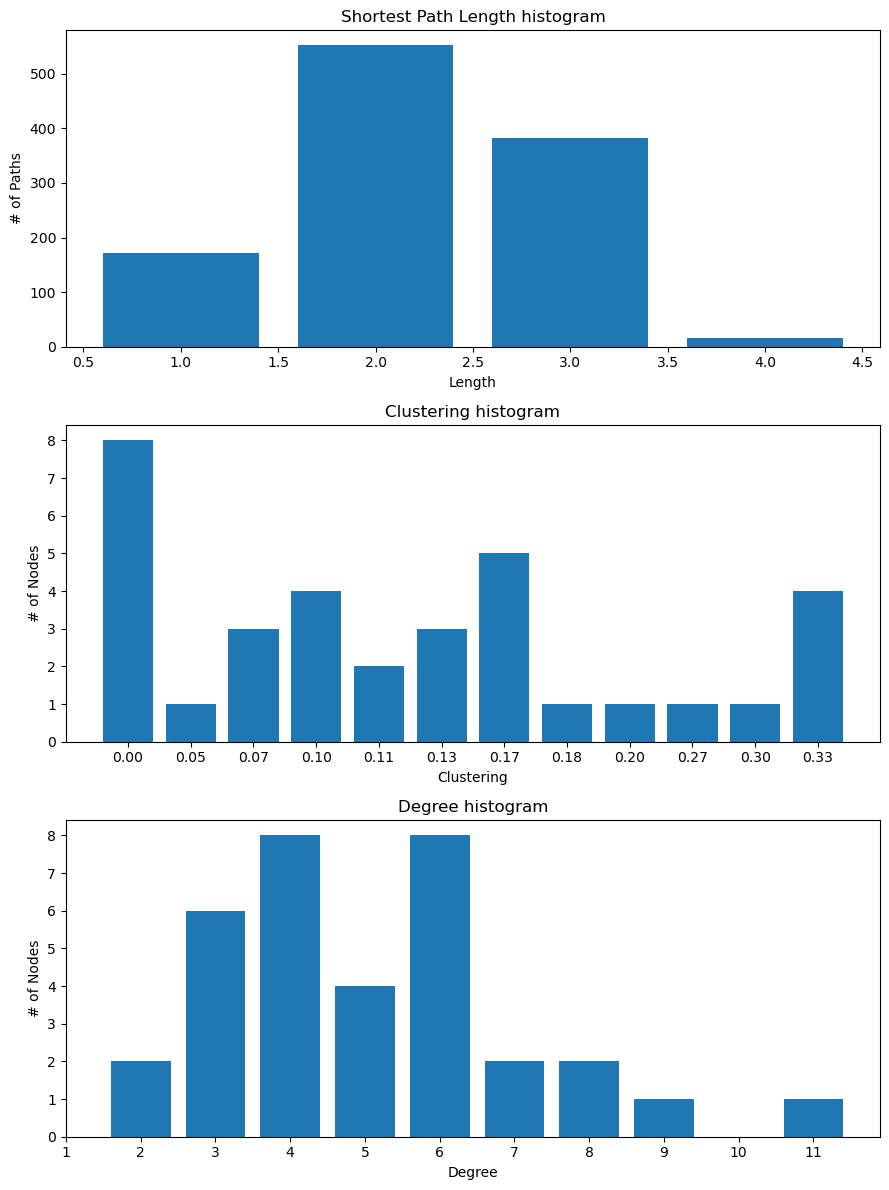

graph 8
-------------------------------------
Betweeness centrality is  {0: 0.04053153286107832, 1: 0.009769570707070706, 2: 0.03516789923039924, 3: 0.08871111001792818, 4: 0.002002984389348026, 5: 0.015726802658620843, 6: 0.006885139271502908, 7: 0.0755578649044558, 8: 0.14400416502689228, 9: 0.03868705999387816, 10: 0.028419681118544746, 11: 0.07938550822073549, 12: 0.010166396103896105, 13: 0.00668454020726748, 14: 0.10013582797673708, 15: 0.014079102715466352, 16: 0.04525032522191613, 17: 0.013044131794131794, 18: 0.055760117407844687, 19: 0.06976201408019589, 20: 0.07399099217281035, 21: 0.055655991735537196, 22: 0.03188322620140802, 23: 0.015179322991822992, 24: 0.02798397940443395, 25: 0.1046935125060125, 26: 0.005709899317853864, 27: 0.0171131635620272, 28: 0.02857463979623071, 29: 0.039122693384057015, 30: 0.01887551106301106, 31: 0.0018871753246753247, 32: 0.06021538436311164, 33: 0.031428188814552456}
Diameter is  4
Clustering coefficient is  0.15567226890756306
Number of co

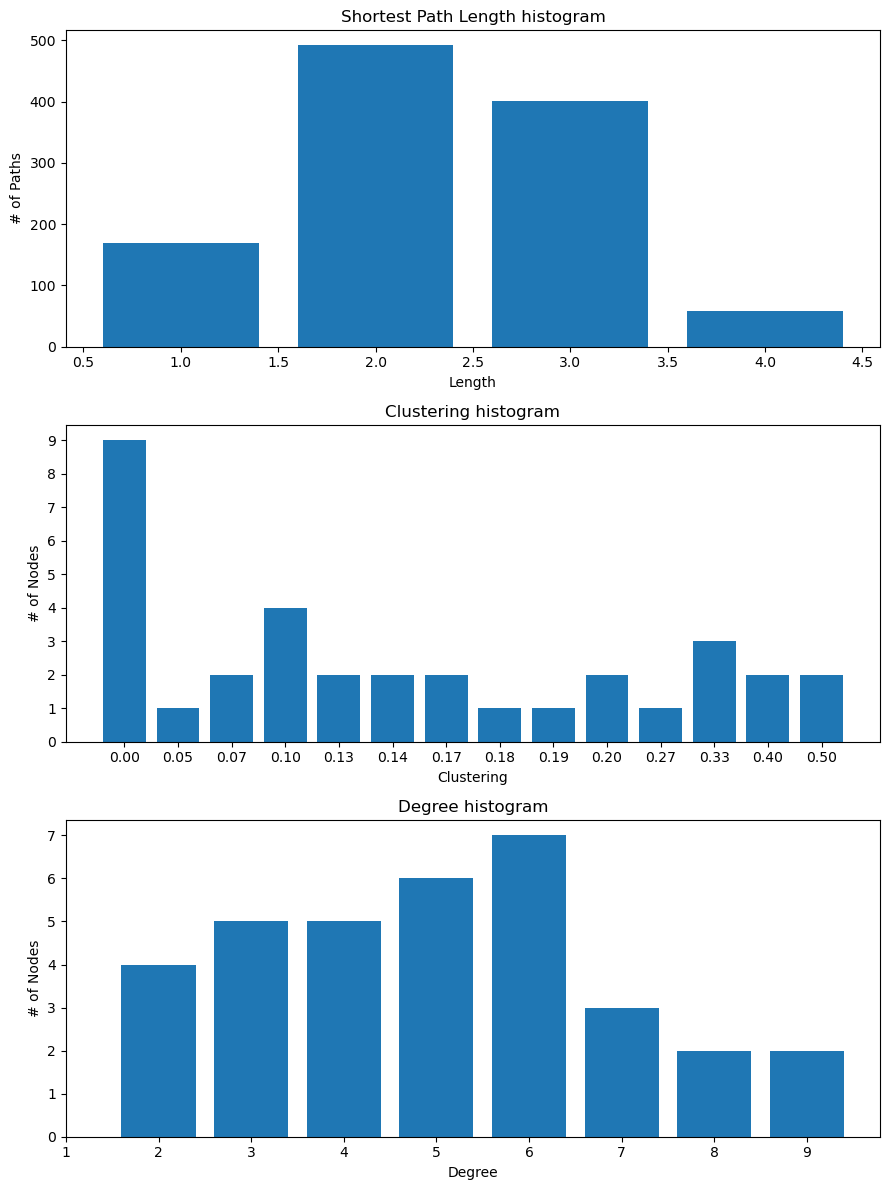

graph 9
-------------------------------------
Betweeness centrality is  {0: 0.07974311568061569, 1: 0.04230248917748918, 2: 0.0, 3: 0.028085167147667147, 4: 0.0895720598845599, 5: 0.0964969636844637, 6: 0.05485810485810488, 7: 0.04573863636363636, 8: 0.14016203703703706, 9: 0.0325937950937951, 10: 0.1606917388167388, 11: 0.0, 12: 0.07504058441558442, 13: 0.005166245791245792, 14: 0.006060606060606061, 15: 0.0632628367003367, 16: 0.08811628186628187, 17: 0.04086850649350649, 18: 0.005023448773448773, 19: 0.0, 20: 0.015159030784030783, 21: 0.005681818181818182, 22: 0.129450006012506, 23: 0.008522727272727272, 24: 0.05997925685425686, 25: 0.01670875420875421, 26: 0.004429713804713804, 27: 0.03145743145743146, 28: 0.01807434463684464, 29: 0.007544191919191918, 30: 0.09228144540644542, 31: 0.1228648088023088, 32: 0.01732954545454545, 33: 0.06446158008658008}
Diameter is  5
Clustering coefficient is  0.0800420168067227
Number of connected components is 1


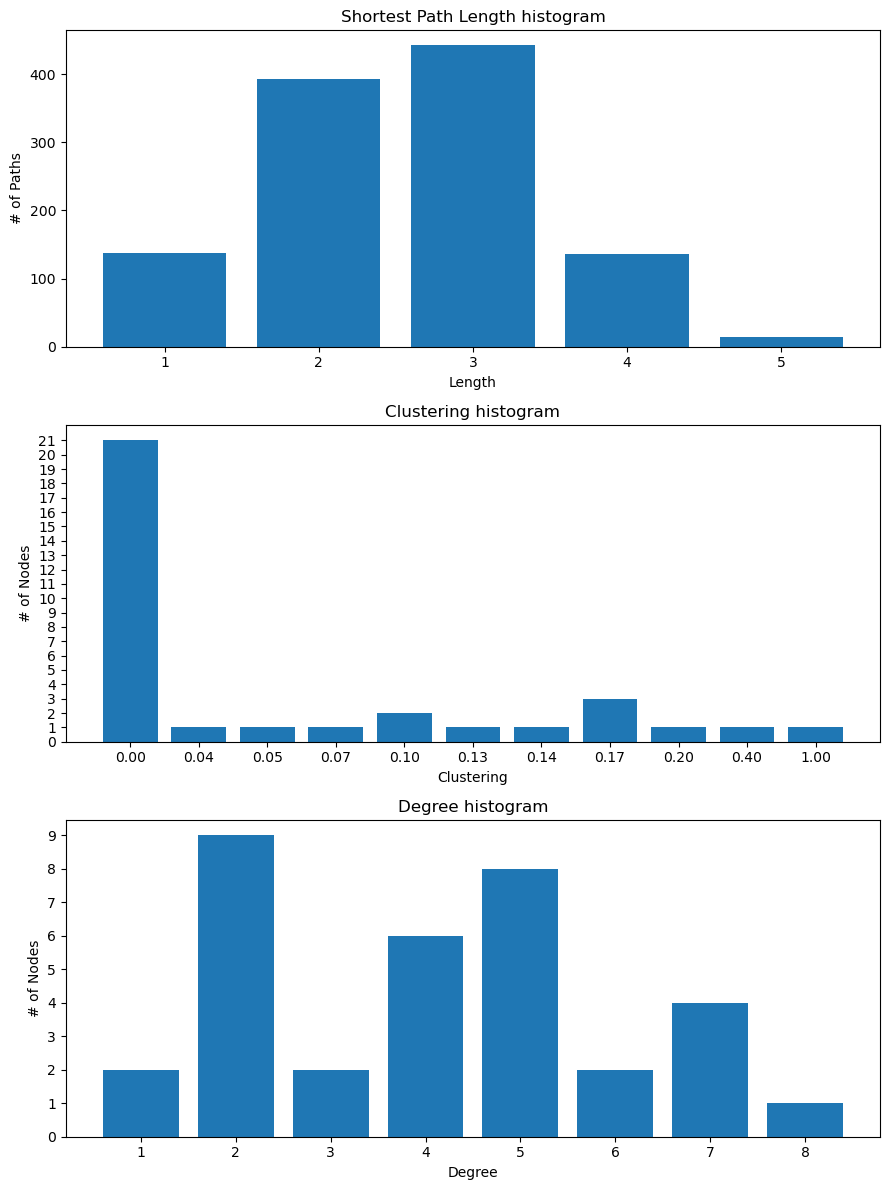

In [47]:
nodes_num = nx.number_of_nodes(G_karate)
probability = nx.number_of_edges(G_karate) / (nodes_num * (nodes_num - 1) / 2)

for i in np.arange(0, 10):
    print("graph", i)
    print("-------------------------------------")
    G = nx.gnp_random_graph(nx.number_of_nodes(G_karate), probability)
    print_features(G)
    draw_histogram(G)